In [1]:
from math import e
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

%matplotlib inline

In [2]:
data_x = pd.read_csv('demo_caries_x.csv', index_col=False)
data_y = pd.read_csv('demo_caries_y.csv', index_col=False)
data = pd.concat([data_x, data_y], axis = 1)

In [3]:
data.head(5)

,ID,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,DMQMILIZ,DMDBORN4,DMDCITZN,DMDEDUC3,...,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR,OUTPUT
0,1,1.103065,-0.117923,-0.224917,-1.022062,1.255341,0.370975,-0.455735,-0.258301,0.733099,...,-0.270316,-2.660909,-0.095293,-0.101203,-0.962825,-0.703204,-0.272598,-0.252338,-0.258429,1
1,2,1.817111,-0.117923,-0.224917,0.978139,1.301970,-4.635980,-0.455735,-0.258301,0.710193,...,-0.270316,-0.661851,1.368985,1.286272,-0.962825,-0.464729,-0.056912,-0.029714,1.506775,1
2,3,1.539426,-0.117923,-0.224917,0.978139,-0.275011,0.370975,-0.455735,-0.258301,-0.093382,...,-0.123348,-0.001640,0.355376,0.336546,1.038318,0.250693,-0.560180,-0.549171,-0.633454,0
3,4,-0.007673,-0.117923,-0.224917,0.978139,-0.220630,0.370975,-0.455735,-0.258301,-0.051323,...,0.317557,0.097166,2.779416,2.741962,1.038318,0.489168,0.302565,0.341327,1.823606,0
4,5,1.975787,-0.117923,-0.224917,-1.022062,1.568519,0.370975,-0.455735,-0.258301,1.055281,...,-0.270316,1.337206,0.922431,0.819710,-0.962825,1.204591,0.230670,0.267119,1.823606,1


In [4]:
data.tail(5)

,ID,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,DMQMILIZ,DMDBORN4,DMDCITZN,DMDEDUC3,...,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR,OUTPUT
3547,3548,-0.920064,-1.669271,-1.428991,-1.022062,-1.131274,0.096357,-0.455735,-0.258301,-0.128883,...,0.464526,0.104000,-0.124253,-0.115462,-0.962825,-1.180152,-0.200703,-0.178130,0.090732,0
3548,3549,0.389019,0.657751,0.377121,-1.022062,-0.274666,0.370975,-0.455735,-0.258301,-0.134488,...,0.317557,0.116472,-0.216017,-0.175408,-0.962825,0.250693,-0.200703,-0.178130,0.465757,0
3549,3550,1.380749,-1.669271,-1.428991,0.978139,1.273062,0.370975,-0.455735,-0.258301,0.779782,...,-0.270316,-0.661851,-0.642938,-0.664809,-0.962825,-0.464729,-0.056912,-0.029714,0.873112,1
3550,3551,0.547696,-1.669271,-1.428991,-1.022062,-0.413676,0.370975,2.193642,2.488659,-0.299916,...,0.023621,0.087866,0.847328,0.946374,1.038318,0.966116,-0.128807,-0.103922,1.054158,0
3551,3552,-0.959733,-1.669271,-1.428991,0.978139,-1.451112,0.127016,-0.455735,-0.258301,-0.149123,...,-0.270316,-0.661851,-0.462428,-0.438712,-0.962825,-0.941678,-0.200703,-0.178130,-0.148508,0


In [5]:
train, test = train_test_split(data, test_size=0.3)
m, n = train.shape
error_train = np.zeros(n)

nx_train = train.iloc[:,:-1].values
ny_train = train.iloc[:,-1].values
# ---- 
nx_test = test.iloc[:,:-1].values
ny_test = test.iloc[:,-1].values


ny_train = ny_train.reshape(-1,1)
ny_test = ny_test.reshape(-1,1)
nx_train = np.append(np.ones(shape=(nx_train.shape[0],1)),nx_train,axis = 1)
nx_test = np.append(np.ones(shape=(nx_test.shape[0],1)),nx_test,axis = 1)
theta = np.zeros(n)

In [6]:
def calculate_theta(X, Y):
    return np.dot(np.linalg.pinv(np.dot(np.transpose(X), X)), np.dot(np.transpose(X), Y))

# Curva 01

In [13]:
train_error = np.zeros(n)
test_error = np.zeros(n)

theta = np.zeros(n)

for i in range(1, n):
    train_ = nx_train[:,0:i]
    test_ = nx_test[:,0:i]
    
    theta = calculate_theta(X=train_, Y=ny_train)
    theta_ = calculate_theta(X=test_, Y=ny_test) 
    
    hyph_train = np.dot(train_, theta)
    hyph_test = np.dot(test_, theta_)
    
    train_error[i] = mean_squared_error(hyph_train, ny_train)
    test_error[i] = mean_squared_error(hyph_test, ny_test)    

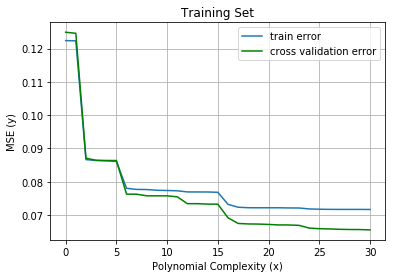

In [14]:
plt.plot(np.arange(n-1),train_error[1:], label = 'train error')
plt.plot(np.arange(n-1),test_error[1:], label = 'cross validation error', color= 'green')
plt.title('Training Set')
plt.xlabel('Polynomial Complexity (x)')
plt.ylabel('MSE (y)')
plt.grid()
plt.legend()
plt.show()

# Curva 02

In [8]:
train_error = np.zeros(nx_test.shape[0])
test_error = np.zeros(nx_test.shape[0])

theta = calculate_theta(X=nx_train, Y=ny_train)

for i in range(1, nx_test.shape[0]):
    hyph_train = np.dot(nx_train[0:i,:], theta)
    hyph_test = np.dot(nx_test[0:i,:], theta)
    
    train_error[i] = mean_squared_error(hyph_train, ny_train[0:i,])
    test_error[i] = mean_squared_error(hyph_test, ny_test[0:i,])    

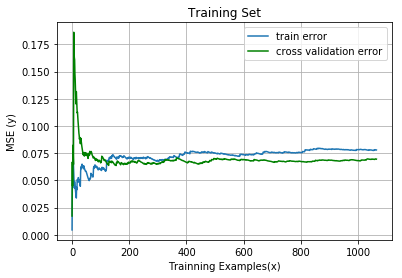

In [9]:
plt.plot(np.arange(test_error.shape[0]-1),train_error[1:], label = 'train error')
plt.plot(np.arange(test_error.shape[0]-1),test_error[1:], label = 'cross validation error', color='green')
plt.title('Training Set')
plt.xlabel('Trainning Examples(x)')
plt.ylabel('MSE (y)')
plt.grid()
plt.legend()
plt.show()